In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
import random
import pandas as pd

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [6]:
df_baby = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Baby_5.json', lines=True )
df_electronic = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Electronics_5.json', lines=True )
df_healthAnnPersonalCare = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Health_and_Personal_Care_5.json', lines=True )
df_sportsAndOutdoors = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Sports_and_Outdoors_5.json', lines=True )

In [7]:
print(len(df_baby))
print(len(df_electronic))
print(len(df_healthAnnPersonalCare))
print(len(df_sportsAndOutdoors))

160792
1689188
346355
296337


In [8]:
df_baby = df_baby.iloc[:50000,]
df_baby.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0  A1HK2FQW6KXQB2  097293751X  ...     1373932800  07 16, 2013
1  A19K65VY14D13R  097293751X  ...     1372464000  06 29, 2013
2  A2LL1TGG90977E  097293751X  ...     1395187200  03 19, 2014
3   A5G19RYX8599E  097293751X  ...     1376697600  08 17, 2013
4   A2496A4EWMLQ7  097293751X  ...     1396310400   04 1, 2014

[5 rows x 9 columns]

In [9]:
df_electronic = df_electronic.iloc[:50000,]
df_electronic.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0   AO94DHGC771SJ  0528881469  ...     1370131200   06 2, 2013
1   AMO214LNFCEI4  0528881469  ...     1290643200  11 25, 2010
2  A3N7T0DY83Y4IG  0528881469  ...     1283990400   09 9, 2010
3  A1H8PY3QHMQQA0  0528881469  ...     1290556800  11 24, 2010
4  A24EV6RXELQZ63  0528881469  ...     1317254400  09 29, 2011

[5 rows x 9 columns]

In [10]:
df_healthAnnPersonalCare = df_electronic.iloc[:50000,]
df_healthAnnPersonalCare.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0   AO94DHGC771SJ  0528881469  ...     1370131200   06 2, 2013
1   AMO214LNFCEI4  0528881469  ...     1290643200  11 25, 2010
2  A3N7T0DY83Y4IG  0528881469  ...     1283990400   09 9, 2010
3  A1H8PY3QHMQQA0  0528881469  ...     1290556800  11 24, 2010
4  A24EV6RXELQZ63  0528881469  ...     1317254400  09 29, 2011

[5 rows x 9 columns]

In [11]:
df_sportsAndOutdoors = df_sportsAndOutdoors.iloc[:50000,]
df_sportsAndOutdoors.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0    AIXZKN4ACSKI  1881509818  ...     1390694400  01 26, 2014
1  A1L5P841VIO02V  1881509818  ...     1328140800   02 2, 2012
2   AB2W04NI4OEAD  1881509818  ...     1330387200  02 28, 2012
3  A148SVSWKTJKU6  1881509818  ...     1328400000   02 5, 2012
4   AAAWJ6LW9WMOO  1881509818  ...     1366675200  04 23, 2013

[5 rows x 9 columns]

In [12]:
df_baby = df_baby[['reviewText']]
df_baby.dropna(inplace=True)

df_electronic = df_electronic[['reviewText']]
df_electronic.dropna(inplace=True)

df_healthAnnPersonalCare = df_healthAnnPersonalCare[['reviewText']]
df_healthAnnPersonalCare.dropna(inplace=True)

df_sportsAndOutdoors = df_sportsAndOutdoors[['reviewText']]
df_sportsAndOutdoors.dropna(inplace=True)

In [13]:
dfAll = [df_baby, df_electronic, df_healthAnnPersonalCare, df_sportsAndOutdoors]
#dfAll = [df_baby, df_electronic, df_sportsAndOutdoors]
#dfAll = [df_baby, df_electronic]
df =pd.concat(dfAll)
df.dropna()
df.head()

reviewText
0  Perfect for new parents. We were able to keep ...
1  This book is such a life saver.  It has been s...
2  Helps me know exactly how my babies day has go...
3  I bought this a few times for my older son and...
4  I wanted an alternative to printing out daily ...

In [14]:
# PREPROCESADO
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [15]:
df.dropna()
processed_texts = []
for text in df['reviewText']:
    processed_texts.append(text_preprocessing(text))

In [16]:
processed_texts[:5]

[['perfect',
  'parents',
  'able',
  'track',
  'baby',
  'feeding',
  'sleep',
  'diaper',
  'change',
  'schedule',
  'half',
  'months',
  'life',
  'life',
  'easier',
  'doctor',
  'questions',
  'habits',
  'right'],
 ['book',
  'life',
  'saver',
  'helpful',
  'able',
  'track',
  'trends',
  'answer',
  'pediatrician',
  'questions',
  'communicate',
  'different',
  'times',
  'night',
  'newborn',
  'think',
  'things',
  'required',
  'leave',
  'hospital',
  'went',
  'pages',
  'newborn',
  'version',
  'moved',
  'infant',
  'version',
  'finish',
  'second',
  'infant',
  'book',
  'total',
  'right',
  'baby',
  'turns',
  'things',
  'haves',
  'baby'],
 ['helps',
  'know',
  'exactly',
  'babies',
  'gone',
  'mother',
  'watching',
  'work',
  'section',
  'write',
  'notes',
  'know',
  'need',
  'couldn',
  'happier',
  'book'],
 ['bought',
  'times',
  'older',
  'bought',
  'newborn',
  'super',
  'easy',
  'helps',
  'track',
  'daily',
  'routine',
  'started

In [17]:
dictionary = Dictionary(processed_texts)

In [18]:
list(dictionary.items())

[(0, 'able'),
 (1, 'baby'),
 (2, 'change'),
 (3, 'diaper'),
 (4, 'doctor'),
 (5, 'easier'),
 (6, 'feeding'),
 (7, 'habits'),
 (8, 'half'),
 (9, 'life'),
 (10, 'months'),
 (11, 'parents'),
 (12, 'perfect'),
 (13, 'questions'),
 (14, 'right'),
 (15, 'schedule'),
 (16, 'sleep'),
 (17, 'track'),
 (18, 'answer'),
 (19, 'book'),
 (20, 'communicate'),
 (21, 'different'),
 (22, 'finish'),
 (23, 'haves'),
 (24, 'helpful'),
 (25, 'hospital'),
 (26, 'infant'),
 (27, 'leave'),
 (28, 'moved'),
 (29, 'newborn'),
 (30, 'night'),
 (31, 'pages'),
 (32, 'pediatrician'),
 (33, 'required'),
 (34, 'saver'),
 (35, 'second'),
 (36, 'things'),
 (37, 'think'),
 (38, 'times'),
 (39, 'total'),
 (40, 'trends'),
 (41, 'turns'),
 (42, 'version'),
 (43, 'went'),
 (44, 'babies'),
 (45, 'couldn'),
 (46, 'exactly'),
 (47, 'gone'),
 (48, 'happier'),
 (49, 'helps'),
 (50, 'know'),
 (51, 'mother'),
 (52, 'need'),
 (53, 'notes'),
 (54, 'section'),
 (55, 'watching'),
 (56, 'work'),
 (57, 'write'),
 (58, 'better'),
 (59, 'bo

In [19]:
len(dictionary)

76185

In [20]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

In [21]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(0, 1),
  (1, 2),
  (9, 1),
  (13, 1),
  (14, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1)],
 [(19, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(17, 4),
  (29, 1),
  (38, 1),
  (43, 2),
  (49, 1),
  (50, 1),
  (53, 1),
  (56, 2),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)

In [22]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1)]

In [23]:
# Entrenamos el modelo (LDA)
# jugar con los topics
# Mi modelo indica que 7 es el mejor numero de topics
num_topics = 7

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

In [24]:
lda_model.show_topics()

[(0,
  '0.043*"great" + 0.037*"good" + 0.020*"like" + 0.019*"easy" + 0.018*"price" + 0.018*"works" + 0.017*"product" + 0.017*"bought" + 0.016*"work" + 0.015*"nice"'),
 (1,
  '0.024*"light" + 0.021*"lens" + 0.016*"range" + 0.012*"shooting" + 0.012*"quality" + 0.011*"sound" + 0.010*"better" + 0.009*"good" + 0.008*"shoot" + 0.008*"pair"'),
 (2,
  '0.009*"cable" + 0.009*"unit" + 0.009*"power" + 0.008*"camera" + 0.007*"battery" + 0.007*"model" + 0.006*"problem" + 0.006*"amazon" + 0.006*"batteries" + 0.006*"speed"'),
 (3,
  '0.043*"knife" + 0.016*"blade" + 0.016*"plastic" + 0.014*"tool" + 0.010*"steel" + 0.009*"handle" + 0.009*"knives" + 0.009*"lock" + 0.008*"chain" + 0.008*"sharp"'),
 (4,
  '0.024*"bike" + 0.013*"size" + 0.011*"small" + 0.009*"comfortable" + 0.008*"seat" + 0.008*"carry" + 0.008*"weight" + 0.007*"grip" + 0.007*"fits" + 0.007*"case"'),
 (5,
  '0.067*"water" + 0.047*"pump" + 0.039*"bottle" + 0.016*"stove" + 0.016*"valve" + 0.013*"tube" + 0.013*"bottles" + 0.012*"heat" + 0.011*

In [25]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic #01   Topic #02    Topic #03  ...    Topic #05 Topic #06 Topic #07
0       great       light        cable  ...         bike     water      time
1        good        lens         unit  ...         size      pump      like
2        like       range        power  ...        small    bottle     thing
3        easy    shooting       camera  ...  comfortable     stove     think
4       price     quality      battery  ...         seat     valve      know
5       works       sound        model  ...        carry      tube     watch
6     product      better      problem  ...       weight   bottles     going
7      bought        good       amazon  ...         grip      heat     times
8        work       shoot    batteries  ...         fits     tubes    things
9        nice        pair        speed  ...         case      cold   reviews
10     little        shot       switch  ...        large   lantern      year
11       need       sharp  replacement  ...      camping      bore     tried
12    quality       field       device  ...         ride      food    couple
13  recommend       clear        local  ...         wear      fuel      took
14    perfect        best    available  ...         hold    cooler      days
15     better  headphones         line  ...       pocket   coleman    people
16       love       shots      picture  ...         tire      leak   getting
17       fine      bright         work  ...        heavy      caps     years
18      right       price     features  ...         pack      stem   thought
19      scope    speakers      company  ...         like      pack    having

[20 rows x 7 columns]

In [26]:
# Perplexity y Coherence
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.247767622888462

Coherence Score:  0.4709775647756072


In [27]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.152947 -0.064187       1        1  21.769799
6      0.134890 -0.097823       2        1  19.987564
2      0.091247 -0.130452       3        1  16.873077
4      0.005533  0.212895       4        1  15.102785
1      0.115019 -0.064857       5        1  13.954971
3     -0.076820  0.295559       6        1   8.742779
5     -0.422816 -0.151136       7        1   3.569026, topic_info=           Term          Freq         Total Category  logprob  loglift
104       great  68009.000000  68009.000000  Default  30.0000  30.0000
311        good  68415.000000  68415.000000  Default  29.0000  29.0000
3234      knife  27434.000000  27434.000000  Default  28.0000  28.0000
93         time  43844.000000  43844.000000  Default  27.0000  27.0000
244       water  17684.000000  17684.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
3243       tube   3281.685424   5893.715659   Topic7  -4.3769   2.7473
6997      taste   1133.754384   1345.837696   Topic7  -5.4397   3.1614
251   emergency   1578.218748   3315.191959   Topic7  -5.1089   2.5907
771        pack   1634.660842   7456.626144   Topic7  -5.0738   1.8152
1869       seal   1145.936540   1815.696228   Topic7  -5.4290   2.8726

[404 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1079      1  0.134123  actually
1079      2  0.627648  actually
1079      3  0.032418  actually
1079      4  0.075771  actually
1079      5  0.080803  actually
...     ...       ...       ...
855       2  0.418112     years
855       3  0.085033     years
855       4  0.000497     years
855       5  0.076738     years
855       6  0.010629     years

[739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 3, 5, 2, 4, 6])

In [28]:
pyLDAvis.save_html(vis, '/content/drive/MyDrive/COLAB/NLP/Practica/topics_vis_0.html')

In [29]:
# Número óptimo de topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        
        # Create a list of LDA models
        model_list.append(model)
        
        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [30]:
# Grid sobre el número de topics (puede tardar un buen rato)
start_ = 4
end_ = 10
step_ = 1

In [31]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

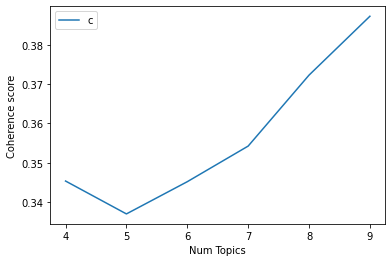

In [32]:
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [33]:
optimal_model_id = -1

optimal_model = model_list[optimal_model_id]

word_dict = {};
for i in range(0, optimal_model.num_topics , 1):
    words = optimal_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic #01    Topic #02 Topic #03  ... Topic #07 Topic #08   Topic #09
0       lens  comfortable      good  ...     water      bike       scope
1      great         like     bikes  ...      pump     great       light
2    leather         wear     watch  ...    bottle      easy     camping
3      range         head   quality  ...      tube     small      camera
4      light         time     great  ...     valve      like      pistol
5      sharp       riding     sound  ...     stove      seat        time
6    lantern         long      like  ...  cleaning    little     battery
7       love         feel     range  ...   bottles     carry       night
8      shoot       little     price  ...     clean      grip   batteries
9     weapon       pillow    better  ...     tubes      size       gauge
10    little         warm     power  ...      rack      fits        ball
11      shot         size      pair  ...     works      tool       great
12      like         cold  survival  ...      food      nice       watch
13    bought       better      high  ...      time      case        need
14     loves        socks     years  ...   coleman      ride        wind
15      fast       gloves    bought  ...      lube    handle       years
16     focus         work      want  ...      caps      tire        guns
17   sharpen        think      time  ...      heat    easily  conditions
18      ring        hands     shots  ...      seal      need       field
19      wide      wearing    little  ...      leak    weight       works

[20 rows x 9 columns]

In [34]:
# Topic dominante por texto
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [35]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=processed_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [perfect, parents, able, track, baby, feeding,...
1            1  ...  [book, life, saver, helpful, able, track, tren...
2            2  ...  [helps, know, exactly, babies, gone, mother, w...
3            3  ...  [bought, times, older, bought, newborn, super,...
4            4  ...  [wanted, alternative, printing, daily, sheets,...
5            5  ...  [great, basics, wish, space, write, things, bi...
6            6  ...  [month, spend, half, days, mother, half, neigh...
7            7  ...  [book, perfect, time, book, easy, track, feedi...
8            8  ...  [wanted, love, pretty, expensive, months, wort...
9            9  ...  [baby, tracker, brand, books, absolute, best, ...

[10 rows x 5 columns]

In [36]:
# Distribución de topics en el corpus
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), num_topics)
df_topic_contribution = pd.DataFrame({'topic': topic_contribution.index, 'contribution': topic_contribution})
df_topic_contribution.reset_index(drop=True, inplace=True)

# Show
df_topic_contribution

topic  contribution
0    5.0      0.182015
1    3.0      0.173455
2    2.0      0.153905
3    7.0      0.135220
4    4.0      0.098715
5    0.0      0.078550
6    1.0      0.073950
7    8.0      0.059160
8    6.0      0.045030